### Q2. Binary Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

b) Solving the Logisitic Regression Problem using Projected Gradient Descent (PGD)

In [24]:
#Reading the dataset from csv
data = pd.read_csv('Data_Q2.csv')

In [25]:
#Displaying the data and its labels
data

,x1,x2,y
0,-0.763770,-0.012259,1
1,-0.769042,-0.030913,1
2,-0.838021,-0.005047,1
3,-0.388726,-0.007426,1
4,-0.508369,0.033678,1
...,...,...,...
395,0.424498,-0.019491,-1
396,0.694070,0.023532,-1
397,0.663057,-0.047523,-1
398,0.552560,-0.037331,-1


In [26]:
X = data.drop(columns="y")
Y = data["y"]

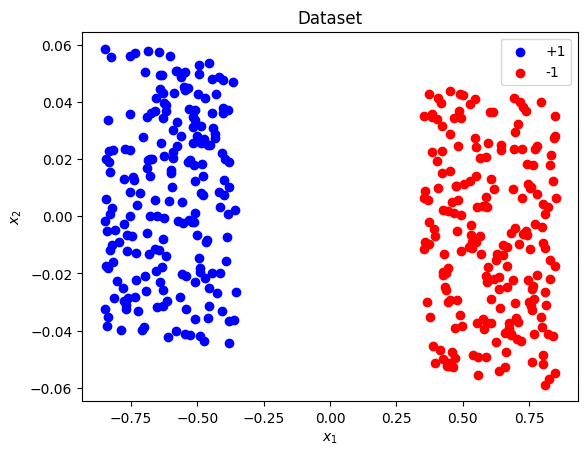

In [29]:
#Visualising the data - shows that it is linearly separable
plt.scatter(X["x1"][Y == 1],X["x2"][Y == 1],color = 'b',label = "+1")
plt.scatter(X["x1"][Y == -1],X["x2"][Y == -1],color = 'r',label = "-1")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Dataset")
plt.legend()
plt.show()

In [30]:
X = np.array(X)
Y = np.array(Y)

In [31]:
#Picking initial w to start Gradient Descent
def init_w():
    initial_w = np.random.random(2)
    return initial_w

In [32]:
#Computing objective value at the end of each iteration
def compute_objective_fn(w):
    expr = -Y*(X@w)
    objective_val = np.sum(np.log(1 + np.exp(expr)))
    return objective_val

In [33]:
#Computing norm of w
def compute_norm(w):
    w_norm = np.linalg.norm(w,ord=2)
    return w_norm

In [34]:
#Computing the gradient of the objective
def grad_fn(w):
    expr = -Y*(X@w)
    numerator = -Y*np.exp(expr)
    denominator = 1 + np.exp(expr)
    const = numerator/denominator
    grad = X.T@const
    return grad

In [ ]:
#Gradient descent algorithm
def gradient_descent(total_iter,step_size):
    objective_val_list = []
    w_norm_list = []
    w_list = []
    
    w = init_w()
    for iter in range(total_iter):
        grad = grad_fn(w)
        w = w - (step_size * grad)
        
        obj_val = compute_objective_fn(w)
        norm = compute_norm(w)
        objective_val_list.append(obj_val)
        w_norm_list.append(norm)
        w_list.append(w)
        
    return w, objective_val_list, w_norm_list, w_list 

In [ ]:
#Solving logistic regression problem
total_iter = 10000
step_size = 0.001
w_star, obj_val, w_norm, w_list = gradient_descent(total_iter,step_size)

In [68]:
print(f"The optimiser w* is: {w_star}")
print(f"The optimal objective value is: {obj_val[-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm[-1]}")

The optimiser w* is: [-13.40222529   0.57422198]
The optimal objective value is: 0.507850201999793
The norm of w* (||w*||_2) is: 13.414521001271396


- The above are not exactly the optimal values as we have not achieved a finite optimiser at the end of $K$ iterations.
- $w_K$ = [-13.40222529   0.57422198]
- The objective value $L(w_K)$ = 0.507850201999793
- $||w_K||_2$ = 13.414521001271396

In [69]:
iterations = [k for k in range(len(obj_val))]
w_list = np.array(w_list)

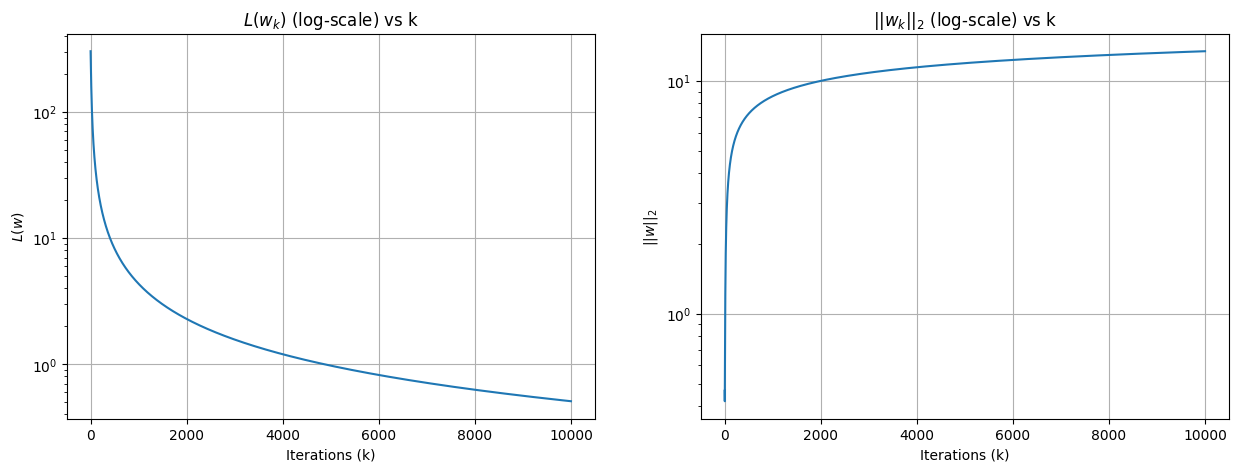

In [ ]:
#Plotting L(w_k) and ||w_k||_2 vs k on log-scale
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(iterations, obj_val)
plt.title(r"$L(w_k)$ (log-scale) vs k")
plt.xlabel('Iterations (k)')
plt.ylabel(r"$L(w)$")
plt.yscale('log')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(iterations, w_norm)
plt.title(r"$||w_k||_2$ (log-scale) vs k")
plt.xlabel('Iterations (k)')
plt.ylabel(r"$||w||_2$")
plt.yscale('log')
plt.grid(True)

plt.show()

d) Solving the alternative formulation - Logistic Regression + $L_2$ regularisation

In [40]:
#Computing modified objective function
def compute_objective_fn_l2(w,C = 1):
    expr = -Y*(X@w)
    objective_val = np.sum(np.log(1 + np.exp(expr))) + (C*(np.linalg.norm(w,ord=2))**2)
    return objective_val

In [41]:
#Computing the gradient of the modified objective
def grad_fn_l2(w,C = 1):
    expr = -Y*(X@w)
    numerator = -Y*np.exp(expr)
    denominator = 1 + np.exp(expr)
    const = numerator/denominator
    grad = X.T@const + (2*C*w)
    return grad

In [42]:
#Gradient Descent for modified optimisation problem
def gradient_descent_l2(total_iter,step_size,C = 1):
    objective_val_list_l2 = []
    w_norm_list_l2 = []
    
    w = init_w()
    for iter in range(total_iter):
        grad = grad_fn_l2(w,C)
        w = w - (step_size * grad)
        
        obj_val = compute_objective_fn_l2(w,C)
        norm = compute_norm(w)
        objective_val_list_l2.append(obj_val)
        w_norm_list_l2.append(norm)
        
    return w, objective_val_list_l2, w_norm_list_l2 

In [ ]:
#Solving logistic regression problem - modified version with C = 1.0
total_iter = 10000
step_size = 0.001
C = 1
w_star, obj_val, w_norm = gradient_descent_l2(total_iter,step_size,C)

In [66]:
print(f"The optimiser w* is: {w_star}")
print(f"The optimal objective value is: {obj_val[-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm[-1]}")

The optimiser w* is: [-5.24103992  0.06976428]
The optimal objective value is: 48.802631953956606
The norm of w* (||w*||_2) is: 5.241504223932821


- With C = 1,
- The optimiser $w^*$ = [-5.24103992  0.06976428]
- The optimal value $\tilde{L}(w^*)$ = 48.802631953956606
- $||w^*||_2$ = 5.241504223932821

In [48]:
iterations = [k for k in range(len(obj_val))]

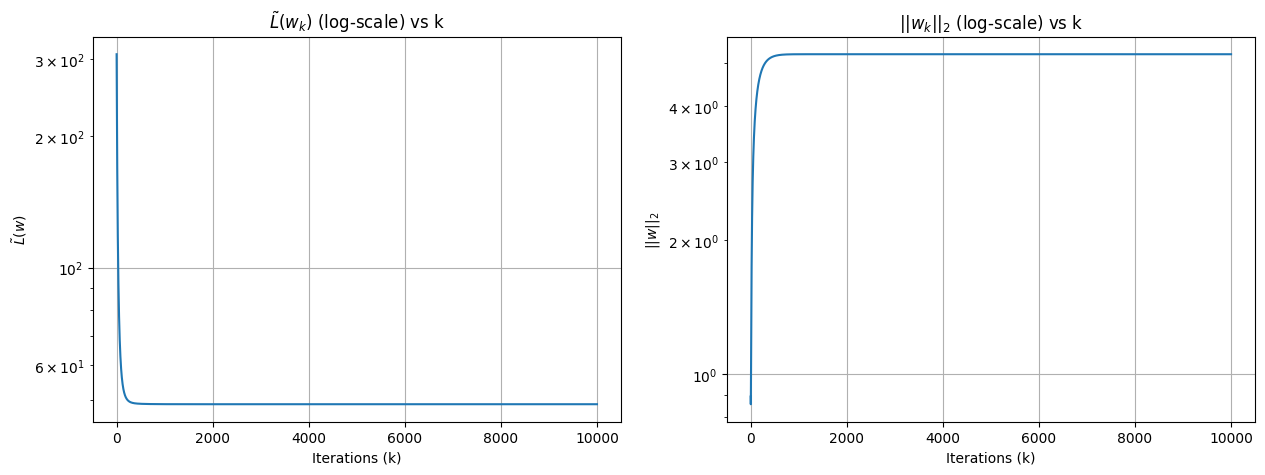

In [ ]:
#Plotting L(w_k) and ||w_k||_2 vs k for C = 1.0 on log-scale
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(iterations, obj_val)
plt.title(r"$\tilde{L}(w_k)$ (log-scale) vs k")
plt.xlabel('Iterations (k)')
plt.ylabel(r"$\tilde{L}(w)$")
plt.yscale('log')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(iterations, w_norm)
plt.title(r"$||w_k||_2$ (log-scale) vs k")
plt.xlabel('Iterations (k)')
plt.ylabel(r"$||w||_2$")
plt.yscale('log')
plt.grid(True)

plt.show()

In [ ]:
#Solving modified logistic regression problem for various values of C
total_iter = 10000
step_size = 0.001
C_list = [0.1,0.5,1,2,5]
w_star_list = []
obj_val_list = []
w_norm_list = []
for c_val in C_list:
    w_star, obj_val, w_norm = gradient_descent_l2(total_iter,step_size,c_val)
    w_star_list.append(w_star)
    obj_val_list.append(obj_val)
    w_norm_list.append(w_norm)

In [54]:
print("C = 0.1")
print(f"The optimiser w* is: {w_star_list[0]}")
print(f"The optimal objective value is: {obj_val_list[0][-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm_list[0][-1]}")

C = 0.1
The optimiser w* is: [-8.84264254  0.18239087]
The optimal objective value is: 11.670776909910934
The norm of w* (||w*||_2) is: 8.844523367520251


In [55]:
print("C = 0.5")
print(f"The optimiser w* is: {w_star_list[1]}")
print(f"The optimal objective value is: {obj_val_list[1][-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm_list[1][-1]}")

C = 0.5
The optimiser w* is: [-6.26070399  0.08194006]
The optimal objective value is: 32.5829456853642
The norm of w* (||w*||_2) is: 6.261240186639808


In [57]:
print("C = 1.0")
print(f"The optimiser w* is: {w_star_list[2]}")
print(f"The optimal objective value is: {obj_val_list[2][-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm_list[2][-1]}")

C = 1.0
The optimiser w* is: [-5.24103992  0.06976428]
The optimal objective value is: 48.80263195395659
The norm of w* (||w*||_2) is: 5.241504223933176


In [58]:
print("C = 2.0")
print(f"The optimiser w* is: {w_star_list[3]}")
print(f"The optimal objective value is: {obj_val_list[3][-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm_list[3][-1]}")

C = 2.0
The optimiser w* is: [-4.2807332   0.05741344]
The optimal objective value is: 70.97909566666026
The norm of w* (||w*||_2) is: 4.281118203377697


In [59]:
print("C = 5.0")
print(f"The optimiser w* is: {w_star_list[4]}")
print(f"The optimal objective value is: {obj_val_list[4][-1]}")
print(f"The norm of w* (||w*||_2) is: {w_norm_list[4][-1]}")

C = 5.0
The optimiser w* is: [-3.10966129  0.04156407]
The optimal objective value is: 110.13393499085217
The norm of w* (||w*||_2) is: 3.1099390525003963


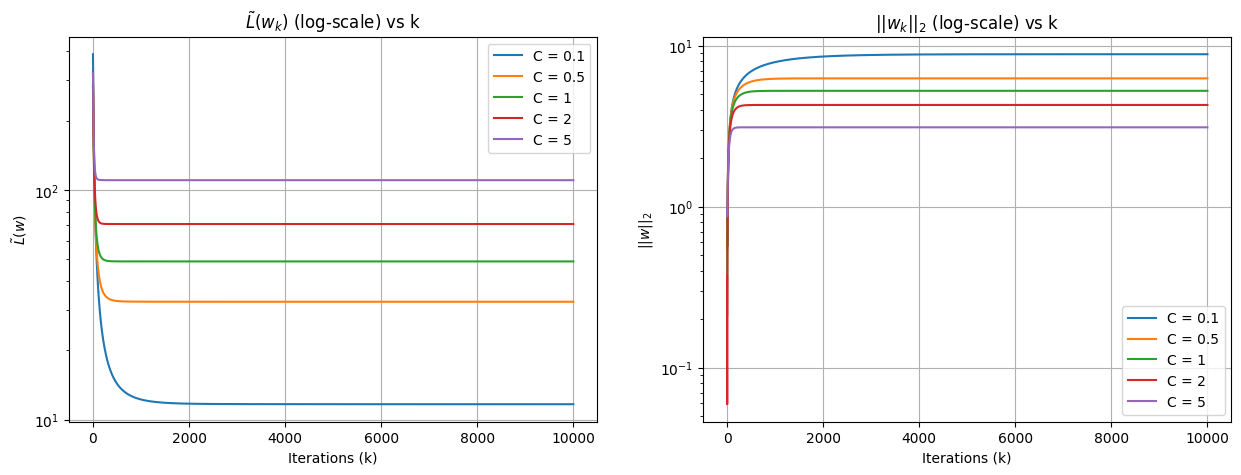

In [ ]:
#Plotting L(w_k) and ||w_k||_2 vs k for various values of C on log-scale
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for c_val,obj_val in zip(C_list,obj_val_list):
    plt.plot(iterations, obj_val, label = f"C = {c_val}")
    plt.title(r"$\tilde{L}(w_k)$ (log-scale) vs k")
    plt.xlabel('Iterations (k)')
    plt.ylabel(r"$\tilde{L}(w)$")
    plt.yscale('log')
    plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
for c_val,w_norm in zip(C_list,w_norm_list):
    plt.plot(iterations, w_norm,label = f"C = {c_val}")
    plt.title(r"$||w_k||_2$ (log-scale) vs k")
    plt.xlabel('Iterations (k)')
    plt.ylabel(r"$||w||_2$")
    plt.yscale('log')
    plt.grid(True)
plt.legend()
plt.show()